<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

### Contents:
- [Problem Statement](#Problem-Statement)
- [Data Collection](#Data-Collection)
- [Data Cleaning & Preprocessing](#Data-Cleaning-&-Preprocessing)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
- [Modeling & Evaluation](#Modeling-&-Evaluation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

# Problem Statement

Problem : Marketing student who want to develop NLP for analyzing the competitive dynamics between Samsung and Apple to understand market trends and the factors influencing consumer preferences in the global electronics industry.

Background : The rivalry between Samsung and Apple is a longstanding and prominent competition in the consumer electronics industry.

Objectives : To develop NLP model that can automatically classify post into Samsung and Apple categories and see if can develop into another function that help gathering more data like classify customer sentiments for sentiment analysis or identifying emerging trends and topics in the discussions related to Samsung and Apple for market trend identification that would help with marketing research in the future.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve , PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier , AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk import bigrams

import re
import string
import pickle
import contractions



# Data Collection

### Due to company policy block web driver / Scraping data support by Nozomi san .Thanks a lot !!!

- data already drop rows that text is None or [deleted] [removed]

In [2]:
# Load data from json
samsung = pd.read_json('data/samsung_withtext.json')
samsung

,vote,title,text,date
0,2,Voice echo galaxy s2,"Redditors,\n\n\nI'm using my sgs2 for a month ...",2011-07-28
1,5,Got a new Samsung TV do I have to use the Sams...,The TV is the un46d6000. I found generic wirel...,2011-11-12
2,5,"The more I read about the Nexus Prime, the les...",Every day a new reason appears to make the Pri...,2011-11-22
3,2,"Reddit, please help me choose (options and pre...","I am from India, and my budget is about 400 US...",2012-01-03
4,2,Samsung Galaxy R Battery?,This\n shows a comparison between Galaxy S2 an...,2012-01-08
...,...,...,...,...
10435,7,Should I be worried about losing the waterproo...,I accidentally placed my S10 on the charger fo...,2020-07-11
10436,2,Screen protector for A71,Can you please suggest some good screen protec...,2020-07-12
10437,1,How secure is Samsung nowadays compared to iOS?,"As a brief background, I work in the financial...",2020-07-12
10438,1,Turn Subtitles permanently off on USB,"Hey guys, just got a q60r and when I play a fi...",2020-07-12


In [3]:
apple = pd.read_json('data/apple_withtext.json')
apple

,vote,title,text,date
0,0,Apple Notes: When I download or share a note I...,"As the title states, I create notes with a dar...",2023-10-24
1,8,"Daily Advice Thread - July 05, 2023",Welcome to the Daily Advice Thread for /r/Appl...,2023-07-05
2,340,"Mysterious air tag in rental van, then caught ...","As title says, we moved using a rental truck. ...",2023-06-25
3,170,"Former Samsung Galaxy users, what was the stra...",I don't know if this has been posted already b...,2023-06-23
4,129,Apple Books irritation,So I finally understand why everyone's complai...,2023-06-18
...,...,...,...,...
19026,3,What is a good and free mind-mapping applicati...,I have to write an essay and mindmAps help.,2010-12-01
19027,5,"DAE have Mac book pro track pad problems, like...","Not sure if this is the correct subreddit, but...",2010-12-01
19028,8,"Bi-monthly ""what apps do you use"" ipad Posting","News: Washington Post, NYT, WSJ, Slate, the Ec...",2010-12-01
19029,0,Why does OSX fuck up text files all the time?,Is there a way to make TextEdit not take every...,2010-12-01


# Data Cleaning & Preprocessing

- Remove HTML tags, special characters, and irrelevant symbols.
- Convert text to lowercase.
- Tokenization: Break text into individual words or subwords.
- Stemming or Lemmatization: Reduce words to their root form.
- Remove stop words

In [4]:
# Check duplicated data in samsung
samsung[samsung.duplicated()].sum()

C:\Users\Pattr11\AppData\Local\Temp\ipykernel_29908\1880251482.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  samsung[samsung.duplicated()].sum()


vote     0.0
title    0.0
text     0.0
dtype: float64

In [5]:
# Check duplicated data in apple
apple[apple.duplicated()].sum()

C:\Users\Pattr11\AppData\Local\Temp\ipykernel_29908\2355785444.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  apple[apple.duplicated()].sum()


vote     0.0
title    0.0
text     0.0
dtype: float64

In [6]:
# Check null value in samsung
samsung.isna().sum()

vote     0
title    0
text     0
date     0
dtype: int64

In [7]:
# Check null value in apple
apple.isna().sum()

vote     0
title    0
text     0
date     0
dtype: int64

In [8]:
# labeling data by topic
samsung['topic'] = 'samsung'
samsung

,vote,title,text,date,topic
0,2,Voice echo galaxy s2,"Redditors,\n\n\nI'm using my sgs2 for a month ...",2011-07-28,samsung
1,5,Got a new Samsung TV do I have to use the Sams...,The TV is the un46d6000. I found generic wirel...,2011-11-12,samsung
2,5,"The more I read about the Nexus Prime, the les...",Every day a new reason appears to make the Pri...,2011-11-22,samsung
3,2,"Reddit, please help me choose (options and pre...","I am from India, and my budget is about 400 US...",2012-01-03,samsung
4,2,Samsung Galaxy R Battery?,This\n shows a comparison between Galaxy S2 an...,2012-01-08,samsung
...,...,...,...,...,...
10435,7,Should I be worried about losing the waterproo...,I accidentally placed my S10 on the charger fo...,2020-07-11,samsung
10436,2,Screen protector for A71,Can you please suggest some good screen protec...,2020-07-12,samsung
10437,1,How secure is Samsung nowadays compared to iOS?,"As a brief background, I work in the financial...",2020-07-12,samsung
10438,1,Turn Subtitles permanently off on USB,"Hey guys, just got a q60r and when I play a fi...",2020-07-12,samsung


In [9]:
apple['topic'] = 'apple'
apple

,vote,title,text,date,topic
0,0,Apple Notes: When I download or share a note I...,"As the title states, I create notes with a dar...",2023-10-24,apple
1,8,"Daily Advice Thread - July 05, 2023",Welcome to the Daily Advice Thread for /r/Appl...,2023-07-05,apple
2,340,"Mysterious air tag in rental van, then caught ...","As title says, we moved using a rental truck. ...",2023-06-25,apple
3,170,"Former Samsung Galaxy users, what was the stra...",I don't know if this has been posted already b...,2023-06-23,apple
4,129,Apple Books irritation,So I finally understand why everyone's complai...,2023-06-18,apple
...,...,...,...,...,...
19026,3,What is a good and free mind-mapping applicati...,I have to write an essay and mindmAps help.,2010-12-01,apple
19027,5,"DAE have Mac book pro track pad problems, like...","Not sure if this is the correct subreddit, but...",2010-12-01,apple
19028,8,"Bi-monthly ""what apps do you use"" ipad Posting","News: Washington Post, NYT, WSJ, Slate, the Ec...",2010-12-01,apple
19029,0,Why does OSX fuck up text files all the time?,Is there a way to make TextEdit not take every...,2010-12-01,apple


In [10]:
# Concat 2 dataframe and reset index
df = pd.concat(objs = [samsung, apple], axis=0 , ignore_index=True)
df = df.reset_index(drop=True)
df

,vote,title,text,date,topic
0,2,Voice echo galaxy s2,"Redditors,\n\n\nI'm using my sgs2 for a month ...",2011-07-28,samsung
1,5,Got a new Samsung TV do I have to use the Sams...,The TV is the un46d6000. I found generic wirel...,2011-11-12,samsung
2,5,"The more I read about the Nexus Prime, the les...",Every day a new reason appears to make the Pri...,2011-11-22,samsung
3,2,"Reddit, please help me choose (options and pre...","I am from India, and my budget is about 400 US...",2012-01-03,samsung
4,2,Samsung Galaxy R Battery?,This\n shows a comparison between Galaxy S2 an...,2012-01-08,samsung
...,...,...,...,...,...
29466,3,What is a good and free mind-mapping applicati...,I have to write an essay and mindmAps help.,2010-12-01,apple
29467,5,"DAE have Mac book pro track pad problems, like...","Not sure if this is the correct subreddit, but...",2010-12-01,apple
29468,8,"Bi-monthly ""what apps do you use"" ipad Posting","News: Washington Post, NYT, WSJ, Slate, the Ec...",2010-12-01,apple
29469,0,Why does OSX fuck up text files all the time?,Is there a way to make TextEdit not take every...,2010-12-01,apple


In [11]:
# Create new column for year of the post
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [12]:
# Drop column date
df = df.drop('date', axis=1)

In [13]:
# Check frequency data each topic in year
df.groupby('year')['topic'].value_counts()

year  topic  
2010  apple      1023
2011  samsung       3
2012  apple       750
      samsung      42
2013  apple      2019
      samsung     195
2014  apple      2746
      samsung     664
2015  apple      3280
      samsung     680
2016  apple      2638
      samsung    1264
2017  apple      2897
      samsung    1219
2018  samsung    2385
      apple      1807
2019  samsung    2656
      apple       557
2020  samsung    1332
      apple       322
2021  apple       318
2022  apple       457
2023  apple       217
Name: topic, dtype: int64

In [14]:
# Check data balance
df['topic'].value_counts()

apple      19031
samsung    10440
Name: topic, dtype: int64

In [15]:
# Imbalance data ,  random drop data in apple 40%
data_drop = df[df['topic']=='apple'].sample(frac=0.4, random_state=42)
df = df.drop(data_drop.index)

In [16]:
# Reset index for drop data
df = df.reset_index(drop=True)

In [17]:
# Recheck data balance
df['topic'].value_counts()

apple      11419
samsung    10440
Name: topic, dtype: int64

In [18]:
# Text Cleaning

def clean_text(df,col):
     # Remove HTML tags
    df[col] = df[col].apply(lambda x: re.sub('<.*?>', '', x))

    # Remove non-alphanumeric characters
    df[col] = df[col].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '',x))

    # Remove extra whitespaces
    df[col] = df[col].apply(lambda x: re.sub('\s+', ' ', x).strip())
    
    # Make all text lowercase
    df[col] = df[col].str.lower()
    
    return clean_text
    

In [19]:
clean_text(df,'text')
df.head()

,vote,title,text,topic,year,month
0,2,Voice echo galaxy s2,redditors im using my sgs2 for a month now wor...,samsung,2011,7
1,5,Got a new Samsung TV do I have to use the Sams...,the tv is the un46d6000 i found generic wirele...,samsung,2011,11
2,5,"The more I read about the Nexus Prime, the les...",every day a new reason appears to make the pri...,samsung,2011,11
3,2,"Reddit, please help me choose (options and pre...",i am from india and my budget is about 400 usd...,samsung,2012,1
4,2,Samsung Galaxy R Battery?,this shows a comparison between galaxy s2 and ...,samsung,2012,1


In [20]:
# Create new column for post length
df['post_length'] = df['text'].apply(lambda i : len(i))

In [21]:
# Create new column for word count
df['word_count'] = df['text'].apply(lambda i : len(i.split()))
df

,vote,title,text,topic,year,month,post_length,word_count
0,2,Voice echo galaxy s2,redditors im using my sgs2 for a month now wor...,samsung,2011,7,404,74
1,5,Got a new Samsung TV do I have to use the Sams...,the tv is the un46d6000 i found generic wirele...,samsung,2011,11,131,27
2,5,"The more I read about the Nexus Prime, the les...",every day a new reason appears to make the pri...,samsung,2011,11,601,111
3,2,"Reddit, please help me choose (options and pre...",i am from india and my budget is about 400 usd...,samsung,2012,1,767,142
4,2,Samsung Galaxy R Battery?,this shows a comparison between galaxy s2 and ...,samsung,2012,1,634,133
...,...,...,...,...,...,...,...,...
21854,3,Can the Mid-2007 Macbook output 5.1 sound?,i keep finding conflicting posts with google a...,apple,2010,11,204,41
21855,1,Previous generation iMac on clearance... I had...,three years ago i go my macbook pro top of the...,apple,2010,11,208,28
21856,3,What is a good and free mind-mapping applicati...,i have to write an essay and mindmaps help,apple,2010,12,42,9
21857,8,"Bi-monthly ""what apps do you use"" ipad Posting",news washington post nyt wsj slate the economi...,apple,2010,12,241,39


## Tokenizing

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pattr11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Instantiate tokenizer.
# splits tokens up by spaces or by periods that are not attached to a digit.
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

In [24]:
post_tokens = [tokenizer.tokenize(post.lower()) for post in df['text']]

In [25]:
len(post_tokens)

21859

In [26]:
# Test run tokenizer.
post_tokens[0:3]

[['redditors',
  'im',
  'using',
  'my',
  'sgs2',
  'for',
  'a',
  'month',
  'now',
  'works',
  'great',
  'only',
  'during',
  'voicecalling',
  'i',
  'get',
  'a',
  'lot',
  'of',
  'complaints',
  'bout',
  'voice',
  'echos',
  'google',
  'tells',
  'me',
  'it',
  'could',
  'be',
  'the',
  'belkin',
  'cover',
  'that',
  'i',
  'use',
  'but',
  'without',
  'the',
  'cover',
  'the',
  'problem',
  'remains',
  'a',
  'lil',
  'less',
  'does',
  'anyone',
  'experience',
  'the',
  'same',
  'and',
  'perhaps',
  'found',
  'a',
  'solution',
  'my',
  'apologies',
  'for',
  'parts',
  'o',
  'crappy',
  'english',
  'but',
  'it',
  'isnt',
  'my',
  'first',
  'language',
  'hopefully',
  'someone',
  'can',
  'enlighten',
  'me',
  'thanks'],
 ['the',
  'tv',
  'is',
  'the',
  'un46d6000',
  'i',
  'found',
  'generic',
  'wireless',
  'usb',
  'adapter',
  'but',
  'im',
  'not',
  'sure',
  'if',
  'itll',
  'work',
  'or',
  'if',
  'samsung',
  'forces',
  '

In [27]:
#Create new column in df
df['tokenized'] = post_tokens
df['tokenized'] = df['tokenized'].apply(lambda row: ' '.join(row))

## Lemmatizing

In [28]:
# Instantiate lemmatizer. 
lemmatizer = WordNetLemmatizer()

In [29]:
# Lemmatize tokens.
tokens_lem = [[lemmatizer.lemmatize(w) for w in token_list] for token_list in post_tokens]
df['lemmatized'] = tokens_lem
df['lemmatized'] = df['lemmatized'].apply(lambda row: ' '.join(row))
df.head()

,vote,title,text,topic,year,month,post_length,word_count,tokenized,lemmatized
0,2,Voice echo galaxy s2,redditors im using my sgs2 for a month now wor...,samsung,2011,7,404,74,redditors im using my sgs2 for a month now wor...,redditors im using my sgs2 for a month now wor...
1,5,Got a new Samsung TV do I have to use the Sams...,the tv is the un46d6000 i found generic wirele...,samsung,2011,11,131,27,the tv is the un46d6000 i found generic wirele...,the tv is the un46d6000 i found generic wirele...
2,5,"The more I read about the Nexus Prime, the les...",every day a new reason appears to make the pri...,samsung,2011,11,601,111,every day a new reason appears to make the pri...,every day a new reason appears to make the pri...
3,2,"Reddit, please help me choose (options and pre...",i am from india and my budget is about 400 usd...,samsung,2012,1,767,142,i am from india and my budget is about 400 usd...,i am from india and my budget is about 400 usd...
4,2,Samsung Galaxy R Battery?,this shows a comparison between galaxy s2 and ...,samsung,2012,1,634,133,this shows a comparison between galaxy s2 and ...,this show a comparison between galaxy s2 and g...


In [30]:
# Display the original and lemmatized tokens
for index, row in df.iterrows():
    original_tokens = word_tokenize(row['text'])
    lemmatized_tokens = word_tokenize(row['lemmatized'])

In [31]:
# Compare tokens to lemmatized version.
list(zip(df['tokenized'], df['lemmatized']))[0:3]

[('redditors im using my sgs2 for a month now works great only during voicecalling i get a lot of complaints bout voice echos google tells me it could be the belkin cover that i use but without the cover the problem remains a lil less does anyone experience the same and perhaps found a solution my apologies for parts o crappy english but it isnt my first language hopefully someone can enlighten me thanks',
  'redditors im using my sgs2 for a month now work great only during voicecalling i get a lot of complaint bout voice echo google tell me it could be the belkin cover that i use but without the cover the problem remains a lil le doe anyone experience the same and perhaps found a solution my apology for part o crappy english but it isnt my first language hopefully someone can enlighten me thanks'),
 ('the tv is the un46d6000 i found generic wireless usb adapter but im not sure if itll work or if samsung forces you to use their one',
  'the tv is the un46d6000 i found generic wireless 

##  Stemming

In [32]:
# Instantiate stemmer.
p_stemmer = PorterStemmer()

In [33]:
# Stem tokens.
df['stemmed'] = [[p_stemmer.stem(word) for word in token_list] for token_list in post_tokens]
df['stemmed'] = df['stemmed'].apply(lambda row: ' '.join(row))
df.head()

,vote,title,text,topic,year,month,post_length,word_count,tokenized,lemmatized,stemmed
0,2,Voice echo galaxy s2,redditors im using my sgs2 for a month now wor...,samsung,2011,7,404,74,redditors im using my sgs2 for a month now wor...,redditors im using my sgs2 for a month now wor...,redditor im use my sgs2 for a month now work g...
1,5,Got a new Samsung TV do I have to use the Sams...,the tv is the un46d6000 i found generic wirele...,samsung,2011,11,131,27,the tv is the un46d6000 i found generic wirele...,the tv is the un46d6000 i found generic wirele...,the tv is the un46d6000 i found gener wireless...
2,5,"The more I read about the Nexus Prime, the les...",every day a new reason appears to make the pri...,samsung,2011,11,601,111,every day a new reason appears to make the pri...,every day a new reason appears to make the pri...,everi day a new reason appear to make the prim...
3,2,"Reddit, please help me choose (options and pre...",i am from india and my budget is about 400 usd...,samsung,2012,1,767,142,i am from india and my budget is about 400 usd...,i am from india and my budget is about 400 usd...,i am from india and my budget is about 400 usd...
4,2,Samsung Galaxy R Battery?,this shows a comparison between galaxy s2 and ...,samsung,2012,1,634,133,this shows a comparison between galaxy s2 and ...,this show a comparison between galaxy s2 and g...,thi show a comparison between galaxi s2 and ga...


In [34]:
# Compare tokens to stemmed version.
list(zip(df['tokenized'], df['stemmed']))[0:3]

[('redditors im using my sgs2 for a month now works great only during voicecalling i get a lot of complaints bout voice echos google tells me it could be the belkin cover that i use but without the cover the problem remains a lil less does anyone experience the same and perhaps found a solution my apologies for parts o crappy english but it isnt my first language hopefully someone can enlighten me thanks',
  'redditor im use my sgs2 for a month now work great onli dure voicecal i get a lot of complaint bout voic echo googl tell me it could be the belkin cover that i use but without the cover the problem remain a lil less doe anyon experi the same and perhap found a solut my apolog for part o crappi english but it isnt my first languag hope someon can enlighten me thank'),
 ('the tv is the un46d6000 i found generic wireless usb adapter but im not sure if itll work or if samsung forces you to use their one',
  'the tv is the un46d6000 i found gener wireless usb adapt but im not sure if i

Noted : Stemmed text seems to have a lot of spelling errors so I will use Lemmatize text for EDA instead.

## Stop Word Removal

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pattr11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# Print English stopwords.
stopwords =  stopwords.words('english')

In [37]:
# Add on new stopwords to list from system warning
new_stopwords = ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would' , 'wa' , 'im' 
                , 'ha' , 'ive' , 'doe'] 
stopwords = stopwords + new_stopwords

In [38]:
# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords]
    return ' '.join(filtered_tokens)

In [39]:
df['lem_no_stopwords'] = df['lemmatized'].apply(remove_stopwords)
df.head()

,vote,title,text,topic,year,month,post_length,word_count,tokenized,lemmatized,stemmed,lem_no_stopwords
0,2,Voice echo galaxy s2,redditors im using my sgs2 for a month now wor...,samsung,2011,7,404,74,redditors im using my sgs2 for a month now wor...,redditors im using my sgs2 for a month now wor...,redditor im use my sgs2 for a month now work g...,redditors using sgs2 month work great voicecal...
1,5,Got a new Samsung TV do I have to use the Sams...,the tv is the un46d6000 i found generic wirele...,samsung,2011,11,131,27,the tv is the un46d6000 i found generic wirele...,the tv is the un46d6000 i found generic wirele...,the tv is the un46d6000 i found gener wireless...,tv un46d6000 found generic wireless usb adapte...
2,5,"The more I read about the Nexus Prime, the les...",every day a new reason appears to make the pri...,samsung,2011,11,601,111,every day a new reason appears to make the pri...,every day a new reason appears to make the pri...,everi day a new reason appear to make the prim...,every day new reason appears make prime look l...
3,2,"Reddit, please help me choose (options and pre...",i am from india and my budget is about 400 usd...,samsung,2012,1,767,142,i am from india and my budget is about 400 usd...,i am from india and my budget is about 400 usd...,i am from india and my budget is about 400 usd...,india budget 400 usd 20000 indian rupee shorti...
4,2,Samsung Galaxy R Battery?,this shows a comparison between galaxy s2 and ...,samsung,2012,1,634,133,this shows a comparison between galaxy s2 and ...,this show a comparison between galaxy s2 and g...,thi show a comparison between galaxi s2 and ga...,show comparison galaxy s2 galaxy r battery spe...


In [40]:
# Save the array of stopwords to txt file
file_path = "data/stopwords.txt"
np.savetxt(file_path, stopwords, fmt="%s", delimiter=" ")


In [41]:
# Import clean and combine data
df.to_csv('data/df_clean.csv',index=False)

In [42]:
# Alternatively, save pickle
import pickle
pickle.dump(df, open('data/df_clean.pkl', 'wb'))

## Data Dictionary

Two subreddits:

* [Subreddit: r/samsung](https://www.reddit.com/r/samsung/)
* [Subreddit: r/apple](https://www.reddit.com/r/apple/)


The posts were scraped separately for each subreddit, and exported into 2 json files in total:
* [`apple_withtext.json`](./data/apple_withtext.json): Posts from subreddit r/apple
* [`samsung_withtext.json`](./data/samsung_withtext.json): Posts from subreddit r/samsung

The cleaned data (from both subreddits) was exported for modelling:
* [`df.csv`](./data/df.csv): Cleaned and combined text data

|Feature|Type|Description|
|:--|:--|:--|
|vote|int|The number of upvotes for the submission.|
|title|object|The title of the submission.|
|text|object|The submissions’ selftext - an empty string if a link post.|
|date|datetime|Time the submission was created, represented in Unix Time.|
|topic|object|Provides an instance of Subreddit.|
|post_length|int|Length of text|
|word_count|int|Total number of words in a given piece of text|
|tokenized|object|Breaking down text into individual words or subwords.|
|lemmatized|object|Reducing words in text to their base or root form.|
|stemmed|object|Reducing words in text to their base or root form.|
|lem_no_stopwords|object|Eliminating common words that may not contribute much information in lemmatized|

# Exploratory Data Analysis (EDA)

- Data Distribution
- Word frequency analysis
- Explore n-grams

## Data Distribution

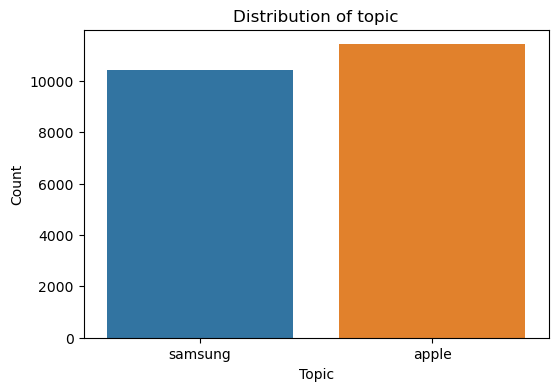

In [43]:
# Plot the distribution of topic
plt.figure(figsize=(6, 4))
sns.countplot(x='topic', data=df)
plt.title('Distribution of topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

Noted : Dataset is slightly imbalanced.

## Word frequency

In [44]:
# Word frequency in lemmatized + remove stopword text
apple_lem = df[df['topic'] == 'apple']['lem_no_stopwords'].apply(lambda x: word_tokenize(x))

apple: 7842
like: 4230
iphone: 3895
get: 3490
new: 3360
one: 3360
phone: 3254
app: 3046
use: 3012
know: 2740
time: 2705
dont: 2481
macbook: 2408
work: 2328
want: 2252
anyone: 2119
ipad: 2063
really: 2018
pro: 2009
mac: 1927


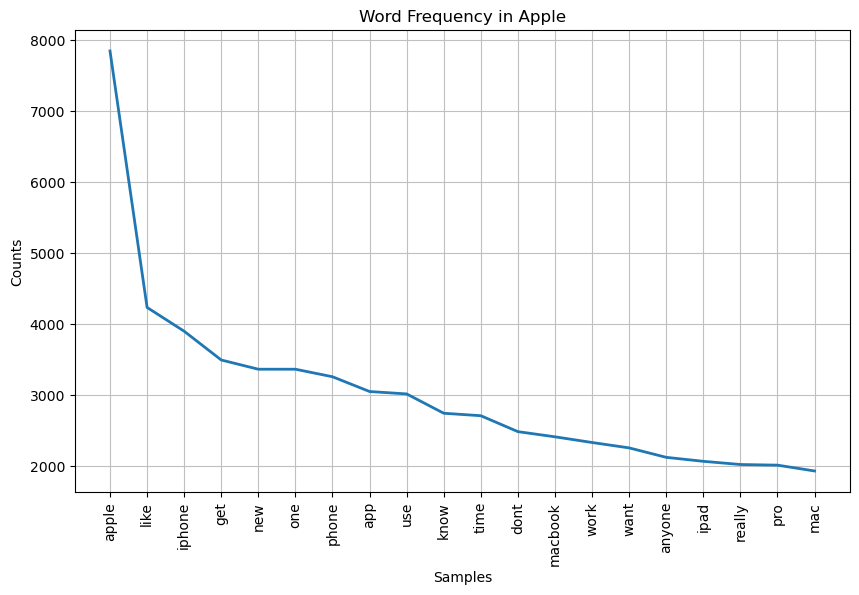

In [45]:
# Flatten the list of tokens
apple_tokens = [token for tokens in apple_lem for token in tokens]

# Calculate word frequencies
freq_dist = FreqDist(apple_tokens)

# Display the top N words and their frequencies
top_words = freq_dist.most_common(20)
for word, frequency in top_words:
    print(f'{word}: {frequency}')

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.title('Word Frequency in Apple')
freq_dist.plot(20, cumulative=False)
plt.show()

In [46]:
ss_lem = df[df['topic'] == 'samsung']['lem_no_stopwords'].apply(lambda x: word_tokenize(x))

phone: 7877
samsung: 5448
get: 3432
like: 2925
one: 2793
screen: 2648
note: 2539
galaxy: 2443
know: 2411
anyone: 2336
new: 2228
use: 2008
work: 1907
time: 1905
dont: 1898
tv: 1724
got: 1688
app: 1688
issue: 1661
back: 1640


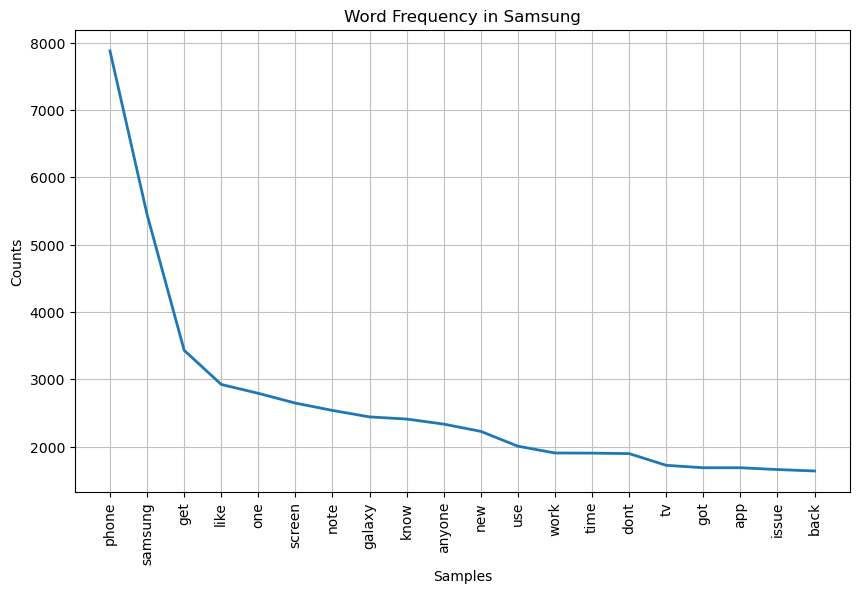

In [47]:
# Flatten the list of tokens
ss_tokens = [token for tokens in ss_lem for token in tokens]

# Calculate word frequencies
freq_dist_ss = FreqDist(ss_tokens)

# Display the top N words and their frequencies
top_words = freq_dist_ss.most_common(20)
for word, frequency in top_words:
    print(f'{word}: {frequency}')

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.title('Word Frequency in Samsung')
freq_dist_ss.plot(20, cumulative=False)
plt.show()

## Explore n-grams

('macbook', 'pro'): 1066
('apple', 'store'): 597
('anyone', 'else'): 547
('iphone', '6'): 485
('app', 'store'): 425
('apple', 'watch'): 407
('apple', 'music'): 390
('anyone', 'know'): 389
('apple', 'tv'): 369
('macbook', 'air'): 354


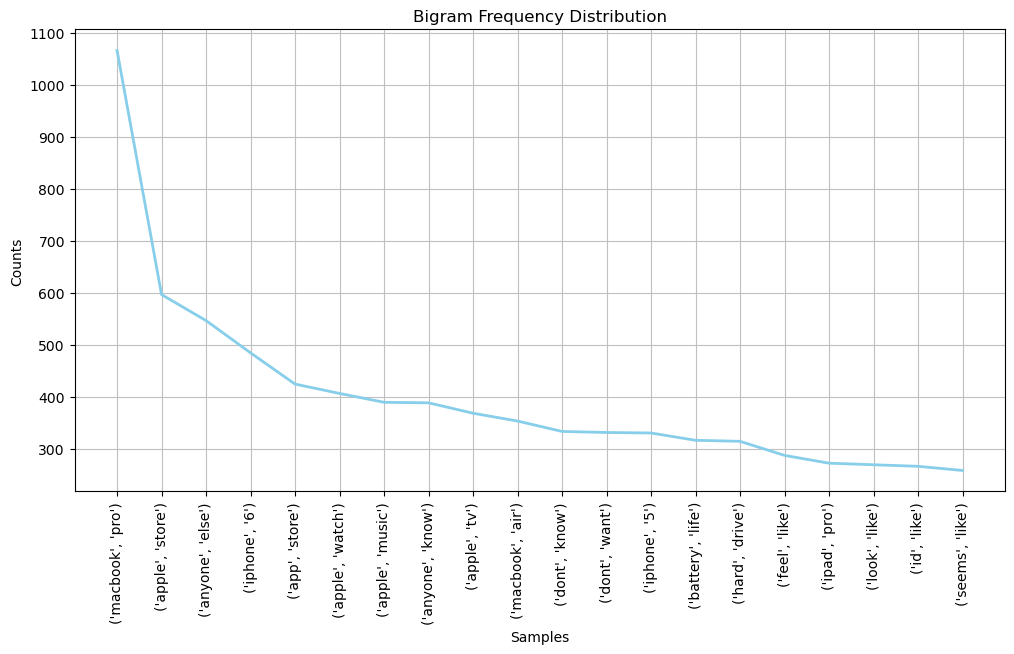

In [48]:
# Create bigrams
bi_grams = list(bigrams(apple_tokens))

# Calculate bigram frequencies
freq_dist_bi = FreqDist(bi_grams)

# Display the top N bigrams and their frequencies
top_bigrams = freq_dist_bi.most_common(10)
for bigram, frequency in top_bigrams:
    print(f'{bigram}: {frequency}')

# Create a bar plot of bigram frequencies
plt.figure(figsize=(12, 6))
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
freq_dist_bi.plot(20, cumulative=False, title='Bigram Frequency Distribution', color='skyblue')
plt.show()

('samsung', 'galaxy'): 548
('anyone', 'know'): 548
('anyone', 'else'): 526
('note', '9'): 399
('dont', 'know'): 351
('note', '8'): 327
('s7', 'edge'): 317
('tech', 'support'): 316
('note', '10'): 311
('battery', 'life'): 310


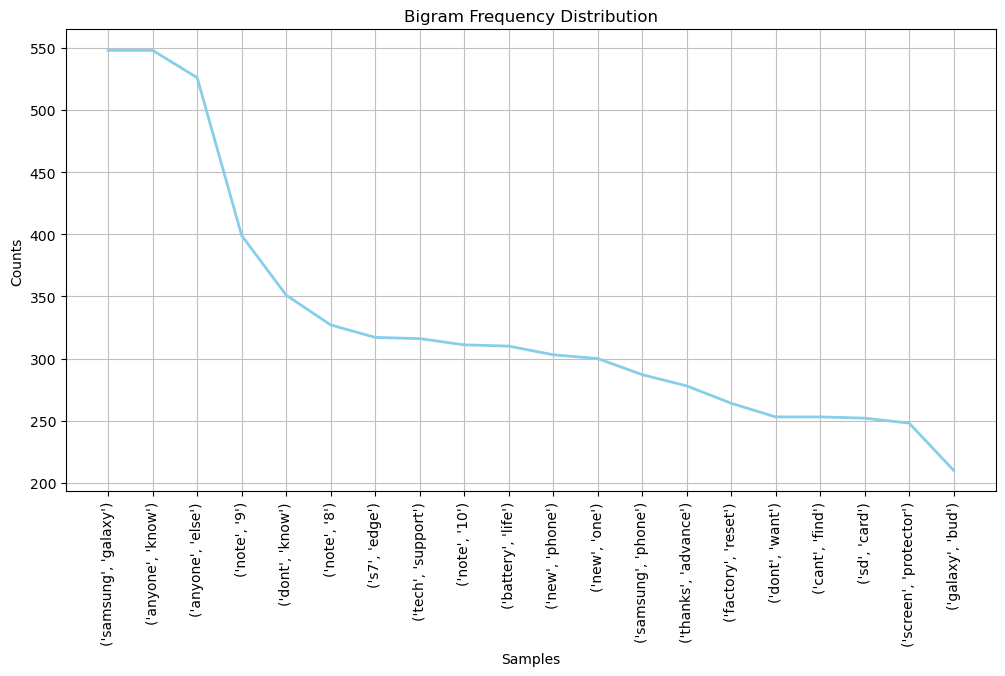

In [53]:

# Create bigrams
ss_grams = list(bigrams(ss_tokens))

# Calculate bigram frequencies
freq_dist_ss_bi = FreqDist(ss_grams)

# Display the top N bigrams and their frequencies
top_bigrams = freq_dist_ss_bi.most_common(10)
for bigram, frequency in top_bigrams:
    print(f'{bigram}: {frequency}')

# Create a bar plot of bigram frequencies
plt.figure(figsize=(12, 6))
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
freq_dist_ss_bi.plot(20, cumulative=False, title='Bigram Frequency Distribution', color='skyblue')
plt.show()

**Please continue on : Project 3 Web APIs & NLP - Model**